# Introduction

This dataset is a simulated representation of the performance metrics for a digital blog website, "ABC Times". The website publishes content in various categories and also organizes events. The dataset contains information about the content category, website visitors, event attendees, and various sources of revenue.

# Business Objective

The objective is to analyze the performance of the website and its content in order to optimize revenue generation. This could involve identifying the most profitable content categories, understanding the relationship between website visitors and revenue, and determining the effectiveness of different revenue sources. The dataset can also be used to conduct A/B testing to compare the performance of different content categories or other features.


# Data Dictionary 

| Variable Name               | Description                                                                                       |
|:-----------------------------|:---------------------------------------------------------------------------------------------------|
| Date                        | The date when the content was published.                                                          |
| Content Category            | The category of the content. Categories include 'Business', 'Finance', 'Tech', etc.               |
| Website Visitors            | The number of visitors to the website on the day the content was published.                       |
| Event Attendees             | The number of attendees at events on the day the content was published.                           |
| Ad Revenue                  | The revenue from ads on the day the content was published.                                        |
| Sponsored Content Revenue   | The revenue from sponsored content on the day the content was published.                          |
| Event Revenue               | The revenue from events on the day the content was published.                                     |
| Partnership Revenue         | The revenue from partnerships on the day the content was published.                               |
| Donation Revenue            | The revenue from donations on the day the content was published.                                  |
| Content Performance Score   | A score representing the performance of the content, with higher scores indicating better performance. |


# Understand the Business and Data

**We have data about website visitors, event attendees, ad revenue, sponsored content revenue, event revenue, partnership revenue, donation revenue, and content performance score. Each of these variables can provide insights into the performance of the website and its content.**

In [275]:
#load data

df = pd.read_csv('DigitalBlogWebsite_Dataset.csv')
df.head()

Date Content Category  Website Visitors  Event Attendees  Ad Revenue  \
0  2020-07-03         Startups            7152.0            369.0      1111.0   
1  2021-05-28         Business            4615.0            345.0       626.0   
2  2022-07-31         Business            2204.0            188.0      3091.0   
3         NaN         Startups            8716.0            174.0      2372.0   
4  2021-11-22             Tech            8936.0            278.0       883.0   

   Sponsored Content Revenue  Event Revenue  Partnership Revenue  \
0                       53.0         1599.0                380.0   
1                     1710.0         2583.0               1085.0   
2                      401.0          647.0                420.0   
3                     1356.0          231.0               1238.0   
4                     1018.0          427.0                 87.0   

   Donation Revenue  Content Performance Score  
0             584.0                       2.45  
1             822.0                       7.59  
2             362.0                       9.35  
3              98.0                       9.32  
4              21.0                       2.62

In [276]:
df.tail()

Date Content Category  Website Visitors  Event Attendees  \
9995  2020-10-02          Finance            5761.0            467.0   
9996  2020-10-15         Startups            1693.0              NaN   
9997  2020-08-19    International            4057.0            378.0   
9998  2022-10-23         Ventures            7607.0            217.0   
9999  2022-04-06          Finance            4753.0            307.0   

      Ad Revenue  Sponsored Content Revenue  Event Revenue  \
9995      1116.0                      480.0          500.0   
9996      3591.0                     1754.0         2305.0   
9997      2211.0                      638.0         2167.0   
9998      1463.0                     1832.0          144.0   
9999      3730.0                        6.0         1429.0   

      Partnership Revenue  Donation Revenue  Content Performance Score  
9995               1450.0             179.0                       2.56  
9996                362.0             874.0                       5.59  
9997                461.0             229.0                       1.18  
9998               1307.0              16.0                       7.99  
9999               1469.0             134.0                       5.87

In [277]:
df.shape  #check shape of the dataset

(10000, 10)

In [278]:
df.info()   #check data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       9500 non-null   object 
 1   Content Category           9500 non-null   object 
 2   Website Visitors           9500 non-null   float64
 3   Event Attendees            9500 non-null   float64
 4   Ad Revenue                 9500 non-null   float64
 5   Sponsored Content Revenue  9500 non-null   float64
 6   Event Revenue              9500 non-null   float64
 7   Partnership Revenue        9500 non-null   float64
 8   Donation Revenue           9500 non-null   float64
 9   Content Performance Score  9500 non-null   float64
dtypes: float64(8), object(2)
memory usage: 781.4+ KB


**Observations:**
    
1. The dataset has missing values in each column
2. Data type for Date variable should be datetime format (need to change while cleaning data)
3. Total 8 numeric variables and 1 object type, exluding date which will be changed to datetime format

In [279]:
df.Date = pd.to_datetime(df.Date) 
df.Date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
9500 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.2 KB


## Checking Mising Data

**Ways to check missing data**

1.  .isna()
2. .isnull()
3. .info()
4. .value_counts(dropna=False)

In [280]:
#check number of missing values in each column

df.isna().sum()  #gives missing values in each column

Date                         500
Content Category             500
Website Visitors             500
Event Attendees              500
Ad Revenue                   500
Sponsored Content Revenue    500
Event Revenue                500
Partnership Revenue          500
Donation Revenue             500
Content Performance Score    500
dtype: int64

### Categorical Data Missing Data

In [281]:
df['Content Category'].value_counts(dropna=True)

Startups         1354
Climate          1315
International    1282
Tech             1274
Ventures         1272
Finance          1268
Business         1260
Start-ups          71
Climat             69
Intrnational       68
Tec                67
Finanse            67
Vntures            67
Buziness           66
Name: Content Category, dtype: int64

### Numeric Columns Missing Data 

In [282]:
df.isna().any(axis=1)

0       False
1       False
2       False
3        True
4       False
        ...  
9995    False
9996     True
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [283]:
#list down rows with missing values

df[df.isna().any(axis=1)]

Date Content Category  Website Visitors  Event Attendees  \
3           NaT         Startups            8716.0            174.0   
7    2020-07-27          Finance            3374.0            150.0   
14          NaT          Climate            8499.0            342.0   
15   2021-08-20    International            4181.0             43.0   
19   2021-01-13          Finance            6503.0            210.0   
...         ...              ...               ...              ...   
9987 2020-10-22         Startups            8568.0            437.0   
9990 2020-11-30         Ventures            5777.0             33.0   
9993 2022-08-29          Finance            6811.0              5.0   
9994 2021-01-09              NaN            7122.0            154.0   
9996 2020-10-15         Startups            1693.0              NaN   

      Ad Revenue  Sponsored Content Revenue  Event Revenue  \
3         2372.0                     1356.0          231.0   
7         3517.0                     1031.0          796.0   
14        3811.0                     1375.0            NaN   
15        2507.0                     1524.0          376.0   
19        3038.0                      646.0            NaN   
...          ...                        ...            ...   
9987      4562.0                        NaN         2754.0   
9990      1757.0                      682.0            NaN   
9993      1745.0                      462.0          482.0   
9994      2352.0                     1700.0         2198.0   
9996      3591.0                     1754.0         2305.0   

      Partnership Revenue  Donation Revenue  Content Performance Score  
3                  1238.0              98.0                       9.32  
7                    30.0             664.0                        NaN  
14                  460.0             209.0                       7.00  
15                  108.0             971.0                        NaN  
19                    NaN             686.0                       1.61  
...                   ...               ...                        ...  
9987                601.0             764.0                       8.52  
9990               1325.0             506.0                       2.33  
9993                  NaN             515.0                       1.50  
9994               1206.0             308.0                       2.04  
9996                362.0             874.0                       5.59  

[4041 rows x 10 columns]

In [284]:
df[df['Date'].isna()]

Date Content Category  Website Visitors  Event Attendees  Ad Revenue  \
3     NaT         Startups            8716.0            174.0      2372.0   
14    NaT          Climate            8499.0            342.0      3811.0   
29    NaT          Climate            3804.0            258.0      2626.0   
31    NaT          Finance            4602.0            470.0      4518.0   
33    NaT          Climate            3568.0            395.0      3977.0   
...   ...              ...               ...              ...         ...   
9783  NaT         Startups            4215.0            105.0         NaN   
9896  NaT          Finance            5280.0             83.0         NaN   
9909  NaT          Finance            3014.0              NaN      1734.0   
9920  NaT         Business            6081.0            226.0      3001.0   
9930  NaT         Ventures            7720.0            295.0         NaN   

      Sponsored Content Revenue  Event Revenue  Partnership Revenue  \
3                        1356.0          231.0               1238.0   
14                       1375.0            NaN                460.0   
29                       1954.0         2279.0               1425.0   
31                       1555.0          745.0                133.0   
33                       1174.0          798.0                  NaN   
...                         ...            ...                  ...   
9783                     1949.0         1390.0                588.0   
9896                     1302.0         1590.0                100.0   
9909                      738.0          769.0                 68.0   
9920                     1944.0          670.0               1443.0   
9930                     1284.0         1567.0               1046.0   

      Donation Revenue  Content Performance Score  
3                 98.0                       9.32  
14               209.0                       7.00  
29               676.0                       5.20  
31               585.0                       5.58  
33               308.0                        NaN  
...                ...                        ...  
9783             503.0                       6.27  
9896             636.0                       9.78  
9909             405.0                       7.96  
9920             974.0                       9.62  
9930             786.0                       3.02  

[500 rows x 10 columns]

**Observations**

1. The dataset has missing data across each column
2. For categorical column "content category" -  There are numerous missing values; however, another catch is that the data also has some inconsistencies. 


## Check Duplicates

In [285]:
df.duplicated().sum()  #no duplicates in the data

0

## Finding Data Anomalies or Inconsistencies

In [286]:
df.describe().T

count         mean          std     min      25%  \
Website Visitors           9500.0  5504.114526  2578.090468  1000.0  3285.75   
Event Attendees            9500.0   250.002632   146.407099     0.0   120.00   
Ad Revenue                 9500.0  2742.830526  1299.166467   500.0  1615.00   
Sponsored Content Revenue  9500.0  1007.877474   577.743146     0.0   508.75   
Event Revenue              9500.0  1498.334526   860.686469     0.0   759.00   
Partnership Revenue        9500.0   753.041158   434.030024     0.0   381.00   
Donation Revenue           9500.0   501.154000   288.606060     0.0   251.00   
Content Performance Score  9500.0     5.517659     2.607024     1.0     3.26   

                               50%      75%      max  
Website Visitors           5523.50  7742.25  10000.0  
Event Attendees             252.00   378.00    500.0  
Ad Revenue                 2752.00  3863.25   5000.0  
Sponsored Content Revenue  1009.00  1510.00   2000.0  
Event Revenue              1512.00  2237.00   3000.0  
Partnership Revenue         752.00  1133.00   1500.0  
Donation Revenue            504.00   749.00   1000.0  
Content Performance Score     5.51     7.79     10.0

In [287]:

df[df['Date'] != df['Date'].astype(np.datetime64)]  #checking if the numeric columns have any anomalies. 


C:\Users\admin\AppData\Local\Temp\ipykernel_10072\91763498.py:1: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  df[df['Date'] != df['Date'].astype(np.datetime64)]  #checking if the numeric columns have any anomalies.


Date Content Category  Website Visitors  Event Attendees  Ad Revenue  \
3     NaT         Startups            8716.0            174.0      2372.0   
14    NaT          Climate            8499.0            342.0      3811.0   
29    NaT          Climate            3804.0            258.0      2626.0   
31    NaT          Finance            4602.0            470.0      4518.0   
33    NaT          Climate            3568.0            395.0      3977.0   
...   ...              ...               ...              ...         ...   
9783  NaT         Startups            4215.0            105.0         NaN   
9896  NaT          Finance            5280.0             83.0         NaN   
9909  NaT          Finance            3014.0              NaN      1734.0   
9920  NaT         Business            6081.0            226.0      3001.0   
9930  NaT         Ventures            7720.0            295.0         NaN   

      Sponsored Content Revenue  Event Revenue  Partnership Revenue  \
3                        1356.0          231.0               1238.0   
14                       1375.0            NaN                460.0   
29                       1954.0         2279.0               1425.0   
31                       1555.0          745.0                133.0   
33                       1174.0          798.0                  NaN   
...                         ...            ...                  ...   
9783                     1949.0         1390.0                588.0   
9896                     1302.0         1590.0                100.0   
9909                      738.0          769.0                 68.0   
9920                     1944.0          670.0               1443.0   
9930                     1284.0         1567.0               1046.0   

      Donation Revenue  Content Performance Score  
3                 98.0                       9.32  
14               209.0                       7.00  
29               676.0                       5.20  
31               585.0                       5.58  
33               308.0                        NaN  
...                ...                        ...  
9783             503.0                       6.27  
9896             636.0                       9.78  
9909             405.0                       7.96  
9920             974.0                       9.62  
9930             786.0                       3.02  

[500 rows x 10 columns]

In [288]:
expected_cat_values = ['Business', 'Finance', 'Tech', 'International', 'Climate', 'Startups', 'Ventures']

In [289]:
df[~df['Content Category'].isin(expected_cat_values)]

Date Content Category  Website Visitors  Event Attendees  \
43   2021-05-28              Tec            5573.0             91.0   
53   2022-09-06              NaN            7844.0            356.0   
63   2020-03-10         Buziness            2605.0            436.0   
75   2021-05-15              NaN            2486.0            424.0   
78   2020-01-26        Start-ups            5994.0            300.0   
...         ...              ...               ...              ...   
9958 2021-02-01     Intrnational            4075.0            111.0   
9963 2022-04-06          Vntures            4968.0            488.0   
9972 2021-04-24              NaN            7678.0            144.0   
9977 2020-04-21         Buziness            7877.0            355.0   
9994 2021-01-09              NaN            7122.0            154.0   

      Ad Revenue  Sponsored Content Revenue  Event Revenue  \
43        1125.0                      945.0          480.0   
53        1306.0                     1766.0         1913.0   
63        3640.0                      280.0         1183.0   
75         800.0                      651.0          973.0   
78        4117.0                       18.0         1503.0   
...          ...                        ...            ...   
9958      2283.0                      277.0          635.0   
9963      4425.0                     1141.0         2371.0   
9972       687.0                      268.0         2574.0   
9977      4021.0                        NaN         2165.0   
9994      2352.0                     1700.0         2198.0   

      Partnership Revenue  Donation Revenue  Content Performance Score  
43                 1232.0             338.0                       4.43  
53                 1210.0              96.0                       9.79  
63                 1317.0             864.0                       6.37  
75                  644.0             487.0                       5.67  
78                 1279.0             254.0                       2.83  
...                   ...               ...                        ...  
9958               1020.0             262.0                       5.63  
9963               1077.0              65.0                       6.98  
9972                  NaN             684.0                       1.72  
9977               1434.0             179.0                       4.98  
9994               1206.0             308.0                       2.04  

[975 rows x 10 columns]

In [290]:
df['Content Category'].value_counts()

Startups         1354
Climate          1315
International    1282
Tech             1274
Ventures         1272
Finance          1268
Business         1260
Start-ups          71
Climat             69
Intrnational       68
Tec                67
Finanse            67
Vntures            67
Buziness           66
Name: Content Category, dtype: int64

**Observations**

- No inconsistencies in numeric data. The data distribution also looks ok
- A few inconsistencies in the categorical column 'Content Category'

## Handling data inconsistency

In [291]:
#cleaning data

df['Content Category'].value_counts()

Startups         1354
Climate          1315
International    1282
Tech             1274
Ventures         1272
Finance          1268
Business         1260
Start-ups          71
Climat             69
Intrnational       68
Tec                67
Finanse            67
Vntures            67
Buziness           66
Name: Content Category, dtype: int64

In [292]:


df['Content Category'] = np.where(df['Content Category'].isin(['Climat']), 'Climate', df['Content Category'])


In [293]:
df['Content Category'] = np.where(df['Content Category'].isin(['Intrnational']), 'International', df['Content Category'])

In [294]:
df['Content Category'] = np.where(df['Content Category'].isin(['Tec','Tech']),'Technology', df['Content Category'])

In [295]:
df['Content Category'] = np.where(df['Content Category'].isin(['Start-ups']),'Startups',df['Content Category'])

In [296]:
df['Content Category'] = np.where(df['Content Category'].isin(['Finanse']),'Finance',df['Content Category'])

In [297]:
df['Content Category'] = np.where(df['Content Category'].isin(['Buziness']),'Business',df['Content Category'])

In [298]:
df['Content Category'] = np.where(df['Content Category'].isin(['Vntures']),'Ventures',df['Content Category'])

In [299]:
df['Content Category'].value_counts(dropna=False)

Startups         1425
Climate          1384
International    1350
Technology       1341
Ventures         1339
Finance          1335
Business         1326
NaN               500
Name: Content Category, dtype: int64

## Univariate Analysis

In [300]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [301]:
df.columns

Index(['Date', 'Content Category', 'Website Visitors', 'Event Attendees',
       'Ad Revenue', 'Sponsored Content Revenue', 'Event Revenue',
       'Partnership Revenue', 'Donation Revenue', 'Content Performance Score'],
      dtype='object')

In [302]:
hist_data = ['Content Category', 'Website Visitors', 'Event Attendees',
       'Ad Revenue', 'Sponsored Content Revenue', 'Event Revenue',
       'Partnership Revenue', 'Donation Revenue', 'Content Performance Score']




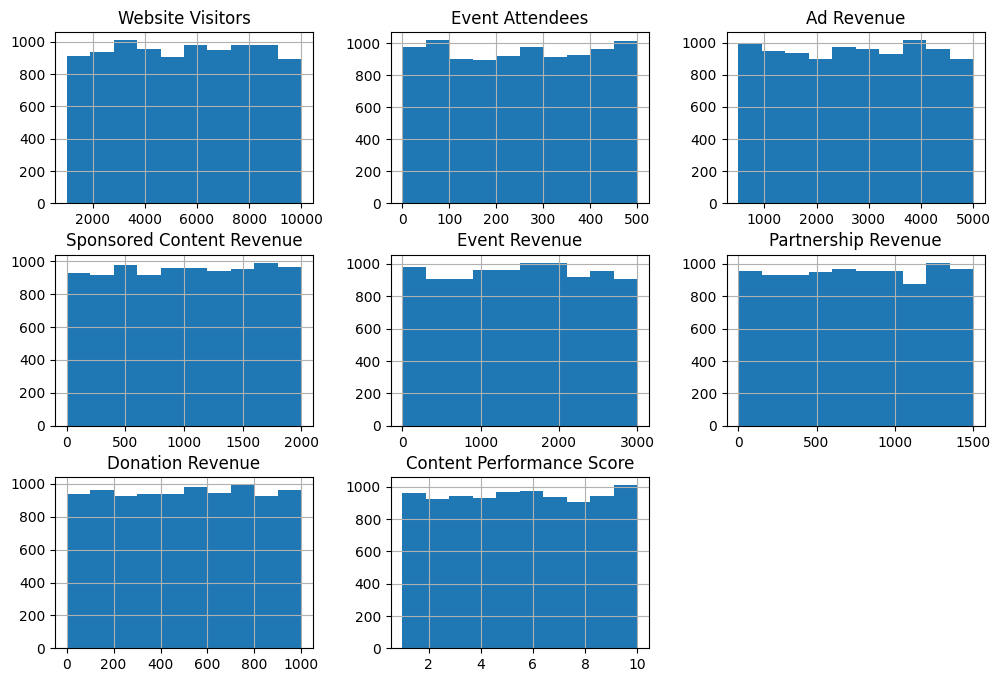

In [303]:
df[hist_data].hist(figsize=(12,8));

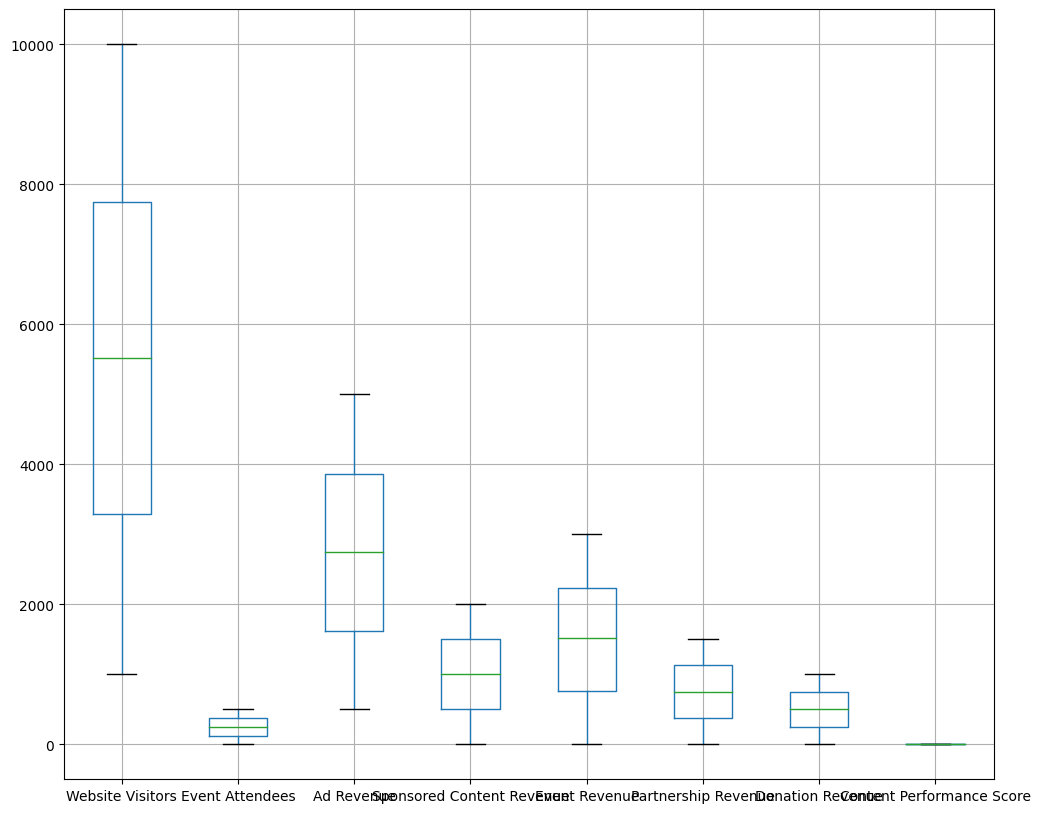

In [304]:
df[hist_data].boxplot(figsize=(12,10));

**No visible outliers to data**

In [305]:
corr = df.drop(columns=['Date']).corr()
corr


C:\Users\admin\AppData\Local\Temp\ipykernel_10072\2281569180.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.drop(columns=['Date']).corr()


Website Visitors  Event Attendees  Ad Revenue  \
Website Visitors                   1.000000        -0.021561   -0.008130   
Event Attendees                   -0.021561         1.000000    0.000650   
Ad Revenue                        -0.008130         0.000650    1.000000   
Sponsored Content Revenue         -0.004473        -0.000913   -0.009935   
Event Revenue                      0.001970        -0.014318   -0.000306   
Partnership Revenue                0.012310        -0.014107    0.007556   
Donation Revenue                  -0.001596        -0.013608    0.017248   
Content Performance Score         -0.013103         0.005648    0.000129   

                           Sponsored Content Revenue  Event Revenue  \
Website Visitors                           -0.004473       0.001970   
Event Attendees                            -0.000913      -0.014318   
Ad Revenue                                 -0.009935      -0.000306   
Sponsored Content Revenue                   1.000000      -0.006385   
Event Revenue                              -0.006385       1.000000   
Partnership Revenue                        -0.013761       0.009905   
Donation Revenue                           -0.004045       0.021202   
Content Performance Score                   0.013098      -0.022738   

                           Partnership Revenue  Donation Revenue  \
Website Visitors                      0.012310         -0.001596   
Event Attendees                      -0.014107         -0.013608   
Ad Revenue                            0.007556          0.017248   
Sponsored Content Revenue            -0.013761         -0.004045   
Event Revenue                         0.009905          0.021202   
Partnership Revenue                   1.000000         -0.004111   
Donation Revenue                     -0.004111          1.000000   
Content Performance Score             0.011966          0.010500   

                           Content Performance Score  
Website Visitors                           -0.013103  
Event Attendees                             0.005648  
Ad Revenue                                  0.000129  
Sponsored Content Revenue                   0.013098  
Event Revenue                              -0.022738  
Partnership Revenue                         0.011966  
Donation Revenue                            0.010500  
Content Performance Score                   1.000000

C:\Users\admin\AppData\Local\Temp\ipykernel_10072\849246310.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="coolwarm");


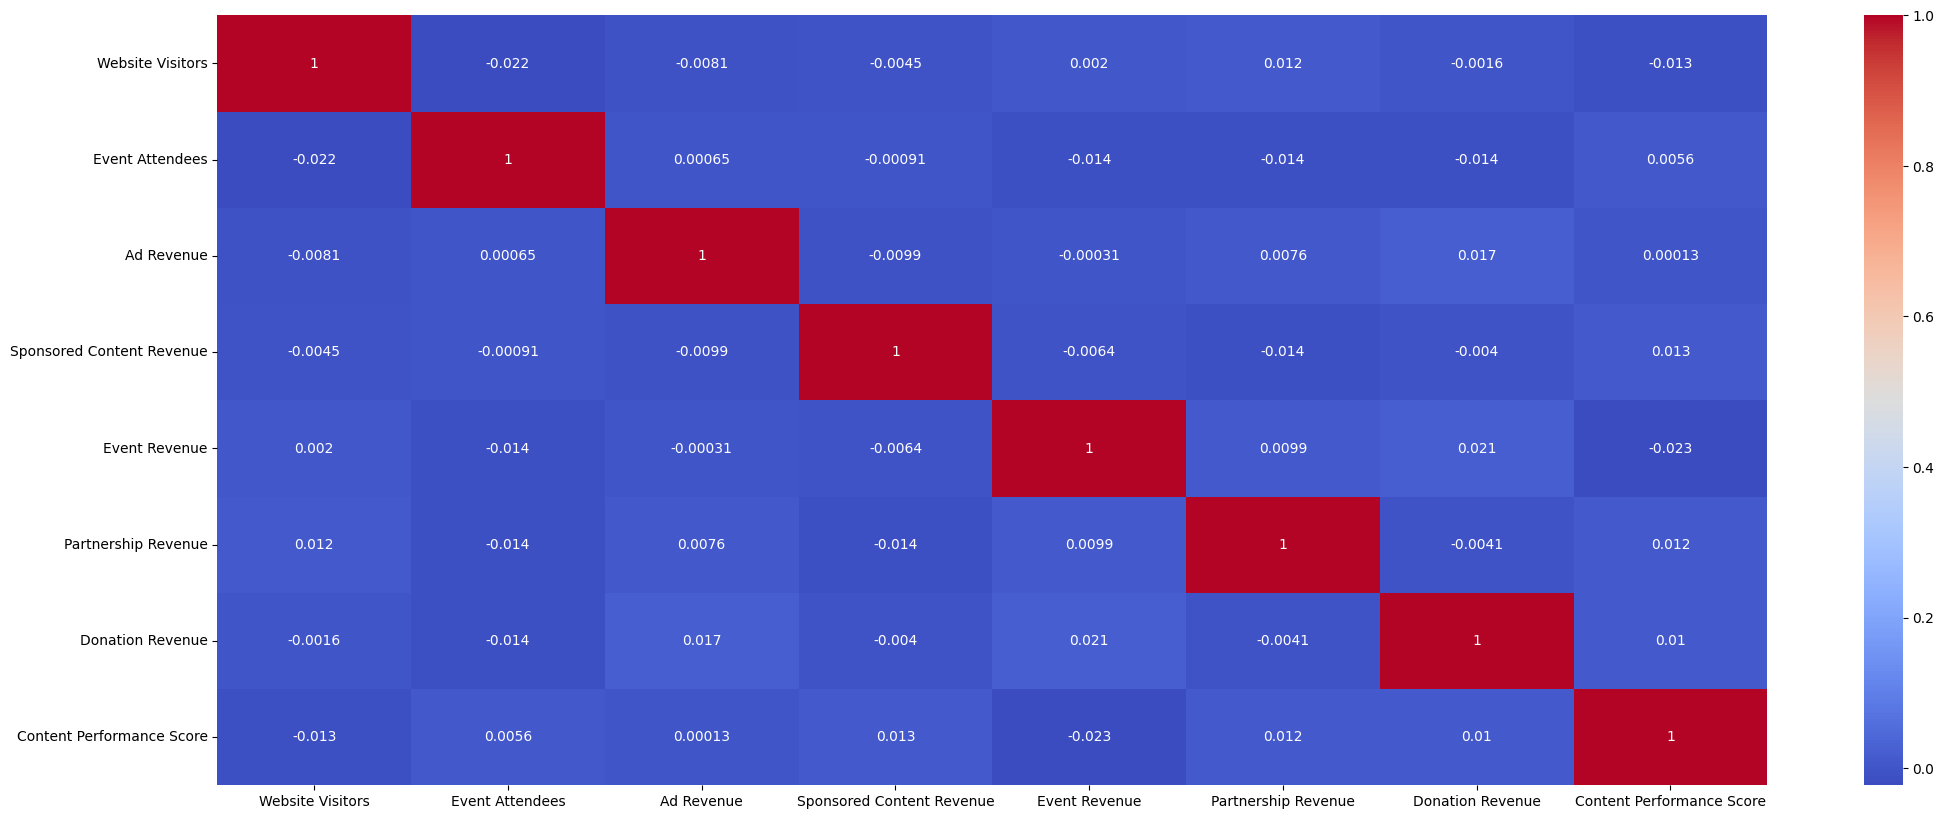

In [306]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm");


Looking at the correlation matrix, it seems that most of your variables are not strongly correlated with each other, as most of the coefficients are close to 0. This means that changes in one variable do not systematically correspond to changes in another.

For example, the correlation between "Website Visitors" and "Event Attendees" is approximately -0.021561, which is close to 0, indicating that there's no strong relationship between these two variables.

C:\Users\admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


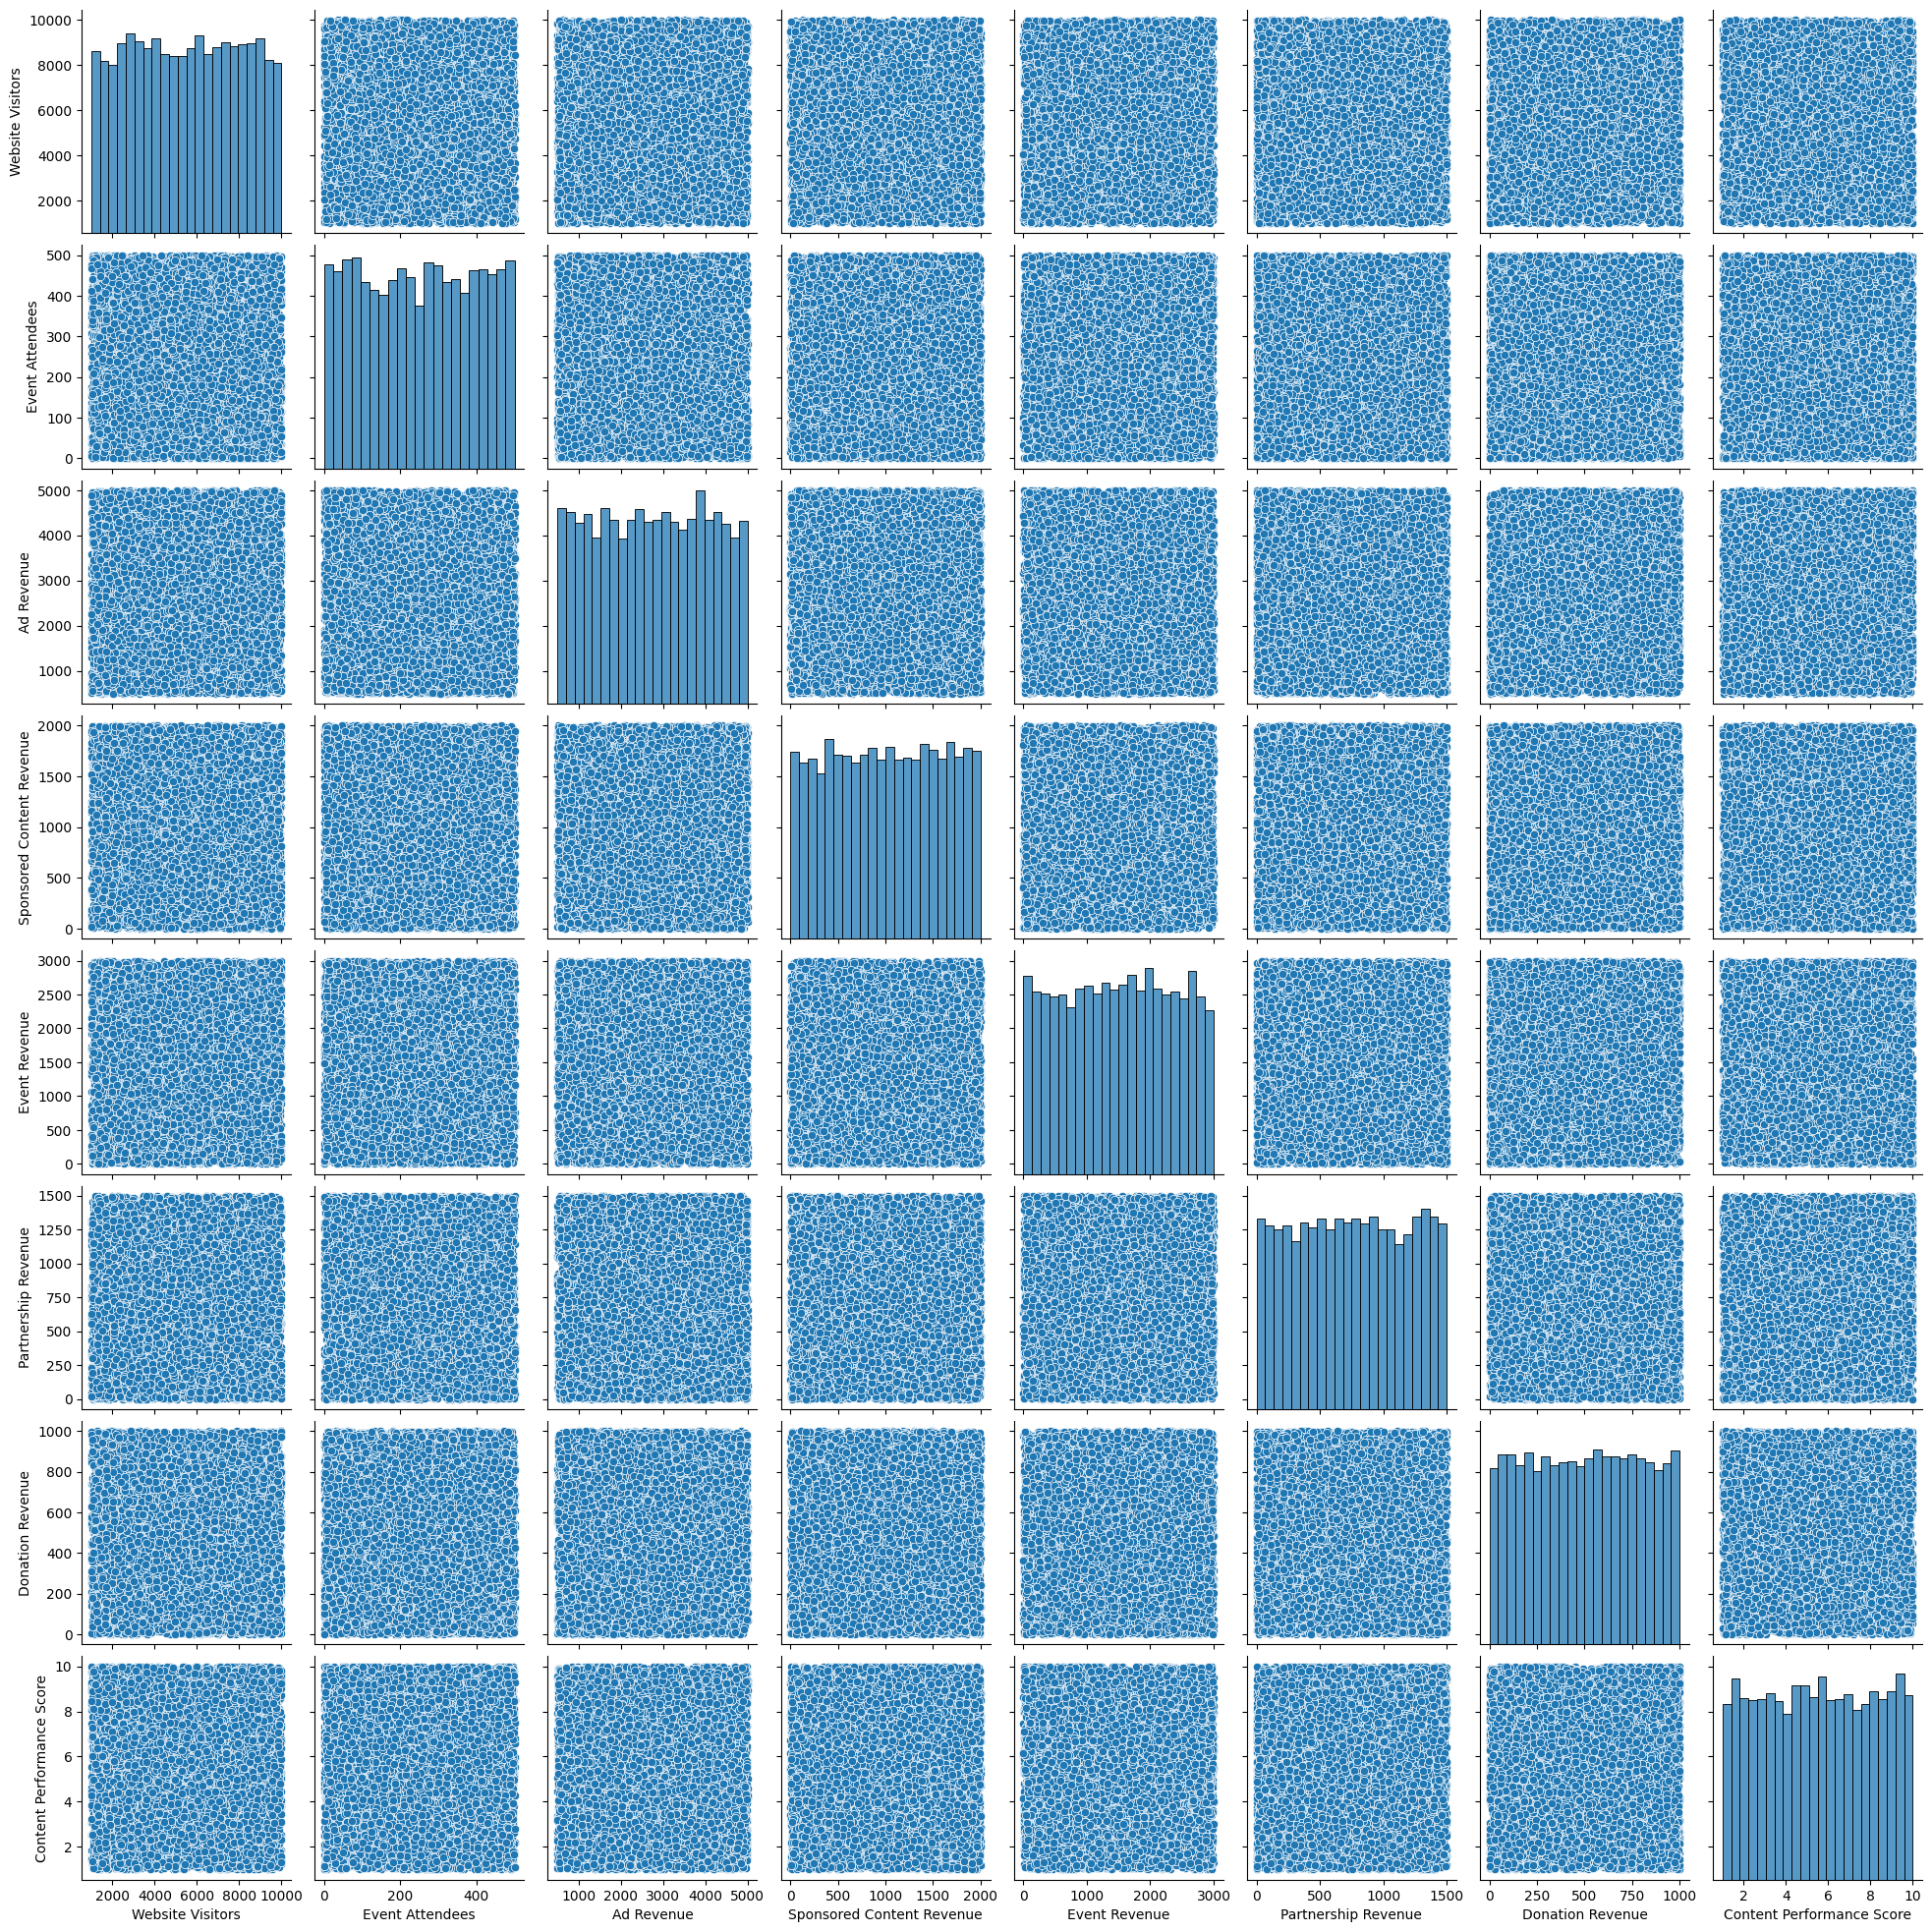

In [307]:
sns.pairplot(df[hist_data])

In [308]:
# Remove 'Content Category' from the list
hist_data = ['Website Visitors', 'Event Attendees', 'Ad Revenue', 
             'Sponsored Content Revenue', 'Event Revenue', 
             'Partnership Revenue', 'Donation Revenue', 
             'Content Performance Score']

# Then, you can run your loop again
results = []
for i in range(len(hist_data)):
    for j in range(i+1, len(hist_data)):
        col1 = hist_data[i]
        col2 = hist_data[j]
        corr, p_value = pearsonr(df.dropna()[col1], df.dropna()[col2])
        results.append((col1, col2, corr, p_value))

results_df = pd.DataFrame(results, columns=['Variable 1', 'Variable 2', 'Correlation', 'P-value'])
results_df


Variable 1                 Variable 2  Correlation  \
0            Website Visitors            Event Attendees    -0.014642   
1            Website Visitors                 Ad Revenue    -0.005007   
2            Website Visitors  Sponsored Content Revenue     0.000494   
3            Website Visitors              Event Revenue     0.005731   
4            Website Visitors        Partnership Revenue     0.010081   
5            Website Visitors           Donation Revenue    -0.009898   
6            Website Visitors  Content Performance Score    -0.018679   
7             Event Attendees                 Ad Revenue    -0.010293   
8             Event Attendees  Sponsored Content Revenue     0.007275   
9             Event Attendees              Event Revenue    -0.010573   
10            Event Attendees        Partnership Revenue    -0.008992   
11            Event Attendees           Donation Revenue    -0.017568   
12            Event Attendees  Content Performance Score    -0.000064   
13                 Ad Revenue  Sponsored Content Revenue    -0.014208   
14                 Ad Revenue              Event Revenue    -0.006515   
15                 Ad Revenue        Partnership Revenue     0.007932   
16                 Ad Revenue           Donation Revenue     0.018546   
17                 Ad Revenue  Content Performance Score    -0.007555   
18  Sponsored Content Revenue              Event Revenue    -0.008615   
19  Sponsored Content Revenue        Partnership Revenue    -0.009397   
20  Sponsored Content Revenue           Donation Revenue    -0.010543   
21  Sponsored Content Revenue  Content Performance Score     0.021544   
22              Event Revenue        Partnership Revenue    -0.001667   
23              Event Revenue           Donation Revenue     0.030362   
24              Event Revenue  Content Performance Score    -0.012444   
25        Partnership Revenue           Donation Revenue    -0.003312   
26        Partnership Revenue  Content Performance Score     0.033922   
27           Donation Revenue  Content Performance Score     0.010484   

     P-value  
0   0.258423  
1   0.699147  
2   0.969590  
3   0.658248  
4   0.436527  
5   0.444924  
6   0.149384  
7   0.426936  
8   0.574491  
9   0.414467  
10  0.487690  
11  0.175102  
12  0.996085  
13  0.272816  
14  0.615109  
15  0.540424  
16  0.152285  
17  0.559846  
18  0.506100  
19  0.468273  
20  0.415830  
21  0.096333  
22  0.897646  
23  0.019086  
24  0.336822  
25  0.798274  
26  0.008823  
27  0.418428

- None of the pairs have a correlation coefficient close to -1 or 1, which means there are no strong linear relationships between any pairs of variables. Most of the p-values are greater than 0.05, which means most of the correlations are not statistically significant. However, there are a few exceptions:

- Event Revenue and Donation Revenue have a correlation of 0.030362 and a p-value of 0.019086, which means there is a weak positive correlation that is statistically significant.
- Partnership Revenue and Content Performance Score have a correlation of 0.033922 and a p-value of 0.008823, which means there is a weak positive correlation that is statistically significant.

## Handling Missing Data

We have established that there are no strong linear relationships between your variables, KNN imputation could be a good choice. 

In [309]:
from sklearn.impute import KNNImputer

In [310]:
# Select only the numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Perform KNN imputation
imputer = KNNImputer(n_neighbors=5)
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Check the result
df.head()

Date Content Category  Website Visitors  Event Attendees  Ad Revenue  \
0 2020-07-03         Startups            7152.0            369.0      1111.0   
1 2021-05-28         Business            4615.0            345.0       626.0   
2 2022-07-31         Business            2204.0            188.0      3091.0   
3        NaT         Startups            8716.0            174.0      2372.0   
4 2021-11-22       Technology            8936.0            278.0       883.0   

   Sponsored Content Revenue  Event Revenue  Partnership Revenue  \
0                       53.0         1599.0                380.0   
1                     1710.0         2583.0               1085.0   
2                      401.0          647.0                420.0   
3                     1356.0          231.0               1238.0   
4                     1018.0          427.0                 87.0   

   Donation Revenue  Content Performance Score  
0             584.0                       2.45  
1             822.0                       7.59  
2             362.0                       9.35  
3              98.0                       9.32  
4              21.0                       2.62

In [311]:
df.isna().sum()

Date                         500
Content Category             500
Website Visitors               0
Event Attendees                0
Ad Revenue                     0
Sponsored Content Revenue      0
Event Revenue                  0
Partnership Revenue            0
Donation Revenue               0
Content Performance Score      0
dtype: int64

In [312]:
categorical_columns = ['Content Category']
# Replace missing values in categorical columns with 'Others'
df[categorical_columns] = df[categorical_columns].fillna('Others')

In [313]:
df.isnull().sum()

Date                         500
Content Category               0
Website Visitors               0
Event Attendees                0
Ad Revenue                     0
Sponsored Content Revenue      0
Event Revenue                  0
Partnership Revenue            0
Donation Revenue               0
Content Performance Score      0
dtype: int64

In [314]:
(df['Date'].shift(1) <= df['Date']).all() #The 'Date' column is not sorted in ascending order.

False

In [316]:
# Get the 'Content Category' for rows with missing dates
missing_dates_content_categories = df[df['Date'].isna()]['Content Category']



In [317]:
# Get the count of missing dates by 'Content Category'
total_count_missing_cat = missing_dates_content_categories.value_counts()
total_count_missing_cat

Startups         85
Business         77
Technology       66
Finance          64
Ventures         64
International    61
Climate          57
Others           26
Name: Content Category, dtype: int64

In [318]:
total_count_missing_cat.describe().T

count     8.000000
mean     62.500000
std      17.312258
min      26.000000
25%      60.000000
50%      64.000000
75%      68.750000
max      85.000000
Name: Content Category, dtype: float64

In [319]:
# Calculate the percentage of missing data for the 'Date' column
percentage_missing_date = (df['Date'].isnull().sum() / len(df['Date'])) * 100
percentage_missing_date


5.0

In [320]:
df['Content Category'].value_counts(dropna='False')

Startups         1425
Climate          1384
International    1350
Technology       1341
Ventures         1339
Finance          1335
Business         1326
Others            500
Name: Content Category, dtype: int64

**Observations**

If we compare the total number of missing values, it is hardly close to 5% across each content category. Considering that I think the right approach is to drop these rows. 

In [321]:
df.columns

Index(['Date', 'Content Category', 'Website Visitors', 'Event Attendees',
       'Ad Revenue', 'Sponsored Content Revenue', 'Event Revenue',
       'Partnership Revenue', 'Donation Revenue', 'Content Performance Score'],
      dtype='object')

In [322]:
df = df.dropna(subset=['Date'])
df = df.reset_index(drop=True)

In [323]:
df.isna().sum()

Date                         0
Content Category             0
Website Visitors             0
Event Attendees              0
Ad Revenue                   0
Sponsored Content Revenue    0
Event Revenue                0
Partnership Revenue          0
Donation Revenue             0
Content Performance Score    0
dtype: int64

In [324]:
df.head(20)

Date Content Category  Website Visitors  Event Attendees  Ad Revenue  \
0  2020-07-03         Startups            7152.0            369.0      1111.0   
1  2021-05-28         Business            4615.0            345.0       626.0   
2  2022-07-31         Business            2204.0            188.0      3091.0   
3  2021-11-22       Technology            8936.0            278.0       883.0   
4  2022-04-11          Finance            1890.0            349.0      1707.0   
5  2021-01-01          Finance            8141.0             95.0      1326.0   
6  2020-07-27          Finance            3374.0            150.0      3517.0   
7  2022-05-05         Startups            4541.0             98.0      1083.0   
8  2020-12-15         Business            8454.0            491.0      3588.0   
9  2020-01-29         Startups            3917.0            443.0      4401.0   
10 2022-01-08         Startups            7346.0            466.0      3487.0   
11 2021-04-30          Climate            7119.0            373.0      3679.0   
12 2022-01-05         Business            3234.0             11.0      2882.0   
13 2021-08-20    International            4181.0             43.0      2507.0   
14 2021-11-25         Business            6875.0            240.0      2393.0   
15 2022-03-26         Business            5418.0            193.0      3203.0   
16 2020-04-22         Business            4313.0            157.0      2406.0   
17 2021-01-13          Finance            6503.0            210.0      3038.0   
18 2021-08-17          Finance            3084.0            405.0      1243.0   
19 2022-08-22          Climate            1525.0            143.0      1265.0   

    Sponsored Content Revenue  Event Revenue  Partnership Revenue  \
0                        53.0         1599.0                380.0   
1                      1710.0         2583.0               1085.0   
2                       401.0          647.0                420.0   
3                      1018.0          427.0                 87.0   
4                      1965.0         1683.0                693.0   
5                      1315.0         1737.0                398.0   
6                      1031.0          796.0                 30.0   
7                      1491.0         1006.0                886.0   
8                       157.0         1106.0               1001.0   
9                       190.0          242.0                449.0   
10                     1335.0          477.0                 30.0   
11                     1991.0         1072.0               1373.0   
12                     1746.0         2830.0               1108.0   
13                     1524.0          376.0                108.0   
14                     2000.0         1533.0                464.0   
15                     1575.0         1631.0               1151.0   
16                      112.0         2825.0               1079.0   
17                      646.0         1325.2                668.6   
18                     1578.0         1046.0                 38.0   
19                     1820.0         2822.0                214.0   

    Donation Revenue  Content Performance Score  
0              584.0                      2.450  
1              822.0                      7.590  
2              362.0                      9.350  
3               21.0                      2.620  
4              551.0                      7.220  
5              880.0                      8.480  
6              664.0                      6.598  
7              985.0                      7.190  
8              876.0                      8.580  
9              740.0                      2.510  
10             799.0                      8.010  
11             753.0                      7.570  
12             933.0                      9.400  
13             971.0                      4.954  
14             136.0                      8.790  
15             780.0                      7.310  
16     

In [325]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df[['Year', 'Month']].head()

Year  Month
0  2020      7
1  2021      5
2  2022      7
3  2021     11
4  2022      4

In [326]:
df.head()

Date Content Category  Website Visitors  Event Attendees  Ad Revenue  \
0 2020-07-03         Startups            7152.0            369.0      1111.0   
1 2021-05-28         Business            4615.0            345.0       626.0   
2 2022-07-31         Business            2204.0            188.0      3091.0   
3 2021-11-22       Technology            8936.0            278.0       883.0   
4 2022-04-11          Finance            1890.0            349.0      1707.0   

   Sponsored Content Revenue  Event Revenue  Partnership Revenue  \
0                       53.0         1599.0                380.0   
1                     1710.0         2583.0               1085.0   
2                      401.0          647.0                420.0   
3                     1018.0          427.0                 87.0   
4                     1965.0         1683.0                693.0   

   Donation Revenue  Content Performance Score  Year  Month  
0             584.0                       2.45  2020      7  
1             822.0                       7.59  2021      5  
2             362.0                       9.35  2022      7  
3              21.0                       2.62  2021     11  
4             551.0                       7.22  2022      4

In [327]:
count_cat = df['Content Category'].value_counts()
count_cat

Startups         1340
Climate          1327
International    1289
Technology       1275
Ventures         1275
Finance          1271
Business         1249
Others            474
Name: Content Category, dtype: int64

In [328]:
content_by_year = df.groupby('Year').size()
content_by_year

Year
2020    3177
2021    3214
2022    3109
dtype: int64

In [ ]:
yoy_content = df

<Axes: xlabel='Content Category', ylabel='count'>

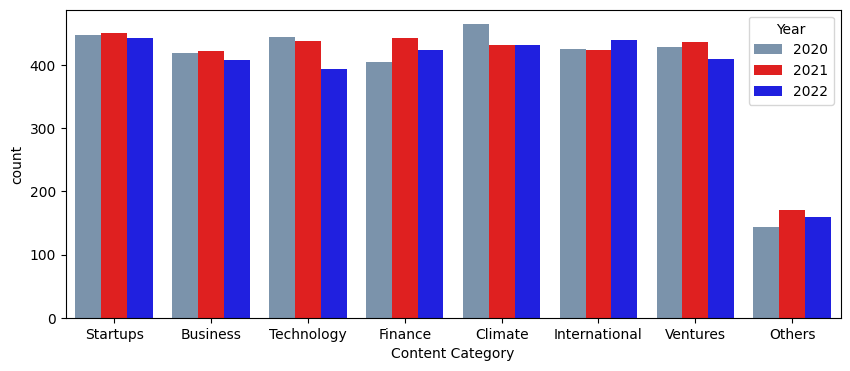

In [355]:
custom_palette = ["#7393B3", "#FF0000", "#0000FF", "#D3D3D3", "#708090", "#E5E4E2"] 

plt.figure(figsize=(10,4))
sns.countplot(x ='Content Category', hue='Year', data=df, palette = custom_palette)

- Fairly even distribution of articles across the different content categories.

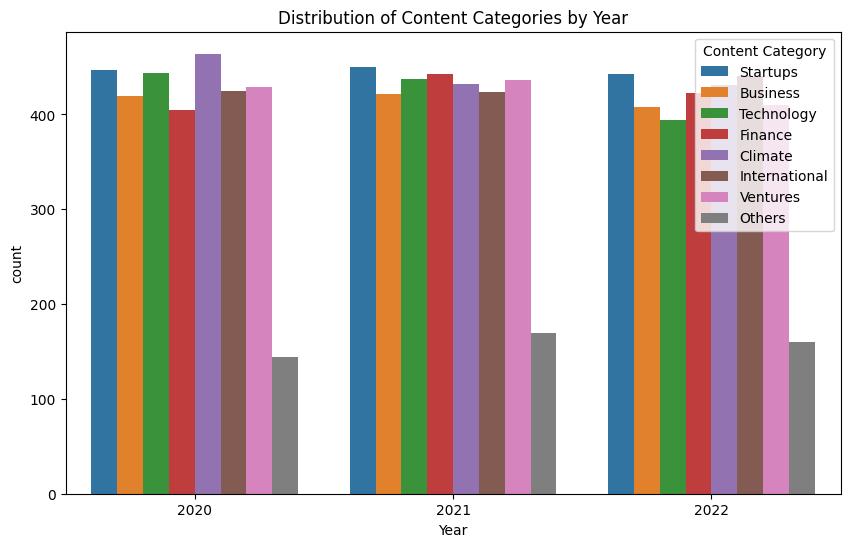

In [394]:
# Bivariate Analysis: 'Year' vs 'Content Category'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Year', hue='Content Category')
plt.title('Distribution of Content Categories by Year')
plt.show()

In [396]:
df.columns

Index(['Date', 'Content Category', 'Website Visitors', 'Event Attendees',
       'Ad Revenue', 'Sponsored Content Revenue', 'Event Revenue',
       'Partnership Revenue', 'Donation Revenue', 'Content Performance Score',
       'Year', 'Month'],
      dtype='object')

In [404]:
df['Total Revenue'] = df['Ad Revenue'] + df['Sponsored Content Revenue'] + df['Event Revenue'] + df['Partnership Revenue']
# Update 'Average Revenue by Year' column
df['Average Revenue by Year'] = df.groupby('Year')['Total Revenue'].transform('mean')
df[['Total Revenue', 'Average Revenue by Year']].head()

Total Revenue  Average Revenue by Year
0         3143.0              5990.373308
1         6004.0              6041.515868
2         4559.0              5961.278096
3         2415.0              6041.515868
4         6048.0              5961.278096

In [407]:
# Total Revenue by Content Category
total_revenue_by_category = df.groupby('Content Category')['Total Revenue'].sum()
total_revenue_by_category.sort_values(ascending=False)

Content Category
Startups         8005502.6
Climate          7887986.4
Ventures         7728640.8
International    7713526.2
Technology       7664419.2
Finance          7647970.4
Business         7524458.4
Others           2809957.6
Name: Total Revenue, dtype: float64

In [414]:
# Total Revenue by Content Performance Score
total_revenue_by_score = df.groupby('Performance Category')['Total Revenue'].sum()
total_revenue_by_score.sort_values(ascending=False)

Performance Category
Average      20392760.2
Poor         18227341.2
Good         12000426.4
Excellent     6361933.8
Name: Total Revenue, dtype: float64

In [410]:
df['Content Performance Score'].describe()

count    9500.000000
mean        5.517254
std         2.555611
min         1.000000
25%         3.350000
50%         5.520000
75%         7.700000
max        10.000000
Name: Content Performance Score, dtype: float64

**the content performance column ranges from 1 to 10, we can adjust the thresholds accordingly. Here's an example:**

'Poor': Content Performance Score <= 4
'Average': 4 < Content Performance Score <= 7
'Good': 7 < Content Performance Score <= 9
'Excellent': Content Performance Score > 9

In [390]:
# Filter the DataFrame to include only data for the year 2020
df_2020 = df[df['Year'] == 2020]

In [413]:
def categorize_performance(score):
    if score <= 4:
        return 'Poor'
    elif score <= 7:
        return 'Average'
    elif score <= 9:
        return 'Good'
    else:
        return 'Excellent'
# Apply the function to the 'Content Performance Score' column
df['Performance Category'] = df['Content Performance Score'].apply(categorize_performance)
df[['Content Performance Score', 'Performance Category']].head()

df.head()

Date Content Category  Website Visitors  Event Attendees  Ad Revenue  \
0 2020-07-03         Startups            7152.0            369.0      1111.0   
1 2021-05-28         Business            4615.0            345.0       626.0   
2 2022-07-31         Business            2204.0            188.0      3091.0   
3 2021-11-22       Technology            8936.0            278.0       883.0   
4 2022-04-11          Finance            1890.0            349.0      1707.0   

   Sponsored Content Revenue  Event Revenue  Partnership Revenue  \
0                       53.0         1599.0                380.0   
1                     1710.0         2583.0               1085.0   
2                      401.0          647.0                420.0   
3                     1018.0          427.0                 87.0   
4                     1965.0         1683.0                693.0   

   Donation Revenue  Content Performance Score  Year  Month  Total Revenue  \
0             584.0                       2.45  2020      7         3143.0   
1             822.0                       7.59  2021      5         6004.0   
2             362.0                       9.35  2022      7         4559.0   
3              21.0                       2.62  2021     11         2415.0   
4             551.0                       7.22  2022      4         6048.0   

   Average Revenue by Year Performance Category  
0              5990.373308                 Poor  
1              6041.515868                 Good  
2              5961.278096            Excellent  
3              6041.515868                 Poor  
4              5961.278096                 Good

Text(0.5, 1.0, 'Content Vs Website Visitors For 2020')

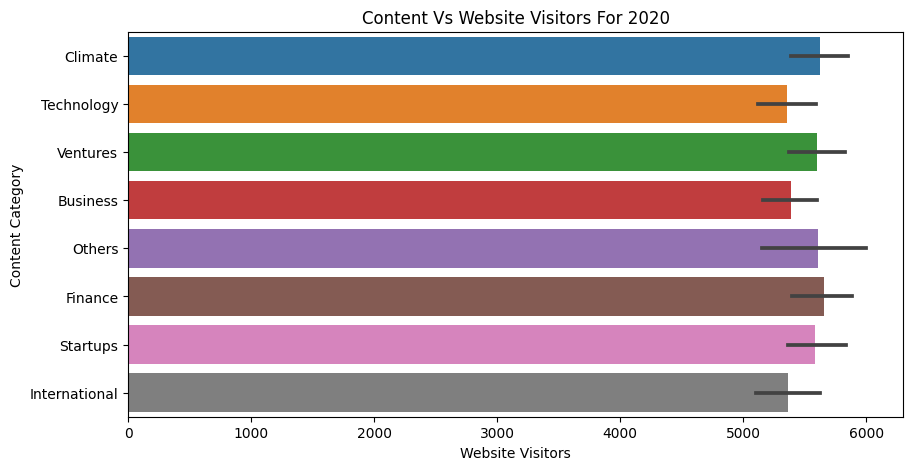

In [393]:


plt.figure(figsize=(10,5))
sns.barplot(x='Website Visitors', y='Content Category', data=df_2020_sorted)
plt.xlabel('Website Visitors')
plt.ylabel('Content Category')
plt.title('Content Vs Website Visitors For 2020')

In [ ]:
Climate and 

In [357]:
content_by_year = df.groupby('Year').size()
content_yoy_change = content_by_year.pct_change() * 100
content_yoy_change

Year
2020         NaN
2021    1.164621
2022   -3.266957
dtype: float64

From 2020 to 2021, there was an increase of approximately 1.16% in the content.
From 2021 to 2022, there was a decrease of approximately 3.27% in the content.

In [ ]:
# Add 'Total Revenue' column
df['Total Revenue'] = df['Ad Revenue'] + df['Sponsored Content Revenue']
# Add 'Average Revenue by Year' column
df['Average Revenue by Year'] = df.groupby('Year')['Total Revenue'].transform('mean')
df[['Total Revenue', 'Average Revenue by Year']].head()